<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [2]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


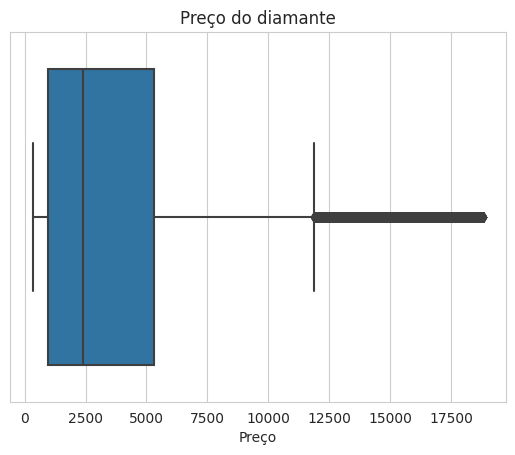

In [3]:
# gráfico do exercício 1

diamonds = data['price']

with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=diamonds)
  grafico.set(title='Preço do diamante', xlabel='Preço')

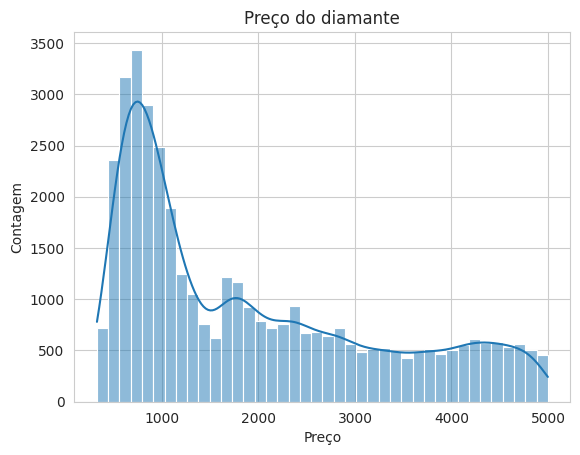

In [4]:
data2 = data.query('0 <= price < 5000')

with sns.axes_style('whitegrid'):

  grafico = sns.histplot(data=data2, x='price', kde=True)
  grafico.set(title='Preço do diamante', xlabel='Preço', ylabel='Contagem')

**Insight do gráfico 1**: Há uma grande concentração de diamantes no preço de 500 a 5000 e com maior relêvancia entre 500 a 1000.

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [5]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


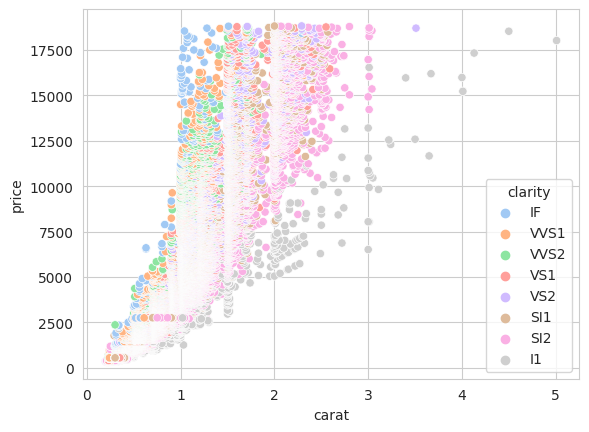

In [6]:
# gráfico do exercício 2

diamonds = data[['price', 'carat', 'clarity']]
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=diamonds, x='carat', y='price', hue='clarity', palette='pastel')

**Insight do gráfico 2**: Diamantes com clarity IF tendem a pesar menos e manter um alto preço. Já os com clarity SI2 e I1 são mais presentes e pesam mais.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [7]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


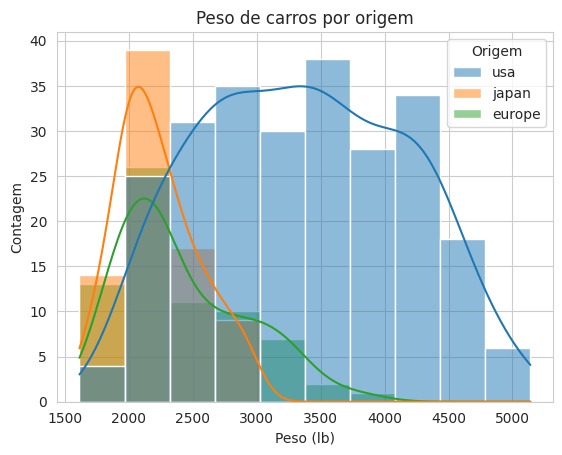

In [8]:
cars = data[['weight', 'origin']]

with sns.axes_style('whitegrid'):
    grafico = sns.histplot(data=cars, x='weight', hue='origin', kde=True)
    grafico.set(title='Peso de carros por origem', xlabel='Peso (lb)', ylabel='Contagem')
    grafico.get_legend().set_title('Origem')

In [1]:
# gráfico do exercício 3

cars = data[['weight', 'cylinders', 'origin']]

with sns.axes_style('whitegrid'):

  grafico = sns.FacetGrid(data=cars, col='cylinders',  hue='origin')
  grafico.map(sns.histplot, "weight", kde=True)
  grafico.set(xlabel='Peso (lb)', ylabel='Contagem')
  grafico.add_legend(title='Origem')
  grafico.set_titles('Cilindros: {col_name}')
  
  

NameError: name 'data' is not defined

**Insight do gráfico 3**: 
<ul>Podemos concluir que:
<li>A relação crescente de peso e cilindros é positiva</li>
<li>Carros leves possuem origem japonesa e europeia</li>
<li>Poucos carros pesados são de origem europeia</li>
<li>A média de carros de origem americana é consediravelmente pesado</li>
</ol>

---